In [0]:
!pip install gensim nltk

In [0]:
#Loading the Data Crawled from Reddit
import pandas as pd
data = pd.read_csv('/content/Reddit_data.csv')
data.head(5)

,Unnamed: 0,flair,title,score,id,url,num_comm,body,created,author,comments
0,0,Politics,A polite request to all Indians here,403,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,82,I don't know if it is the same situation in ot...,1.587063e+09,aaluinsonaout,Our society thrives on abuse of power. We let...
1,1,Politics,Pitting a community against a political party ...,198,futac9,https://www.reddit.com/r/india/comments/futac9...,73,First of all let me start by saying it was stu...,1.586034e+09,chillinvillain122,Our country is just too far in at the moment ...
2,2,Politics,Hit by backlash over posts on lack of medical ...,402,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,67,NaN,1.585254e+09,hipporama,"Well, Some people really deserve to die. ~~/s..."
3,3,Politics,A new political party gave a full front page a...,730,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,146,NaN,1.583678e+09,aaluinsonaout,This looks like an IIPM ad 1. Where did they ...
4,4,Politics,Politics in the time of corona: WB CM question...,82,fxs1vy,https://www.timesnownews.com/india/article/pol...,22,NaN,1.586466e+09,ConcernedCitizen034,"Oh FFS. \n\nYellow, Orange, Green, Red, all a..."


In [0]:
#Checking for Presence of Null Values in Data
data.isnull()

,Unnamed: 0,flair,title,score,id,url,num_comm,body,created,author,comments
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2414,False,False,False,False,False,False,False,False,False,False,False
2415,False,False,False,False,False,False,False,False,False,False,False
2416,False,False,False,False,False,False,False,False,False,False,False
2417,False,False,False,False,False,False,False,False,False,False,False


In [0]:
data.isnull().sum()

Unnamed: 0      0
flair           0
title           0
score           0
id              0
url             0
num_comm        0
body          873
created         0
author          0
comments      185
dtype: int64

In [0]:
#Removing the Null Values(Depending upon how it affects Accuracy)

'''data = data.dropna().reset_index(drop=True)
data.isnull().sum()'''

Unnamed: 0    0
flair         0
title         0
score         0
id            0
url           0
num_comm      0
body          0
created       0
author        0
comments      0
dtype: int64

In [0]:
''' Experimentation Suggested that dropping Data Points containing null Values makes the DataSet Highly
Biased. Hence, the Null Data Points weren't Dropped.'''

In [0]:
#Importing Libraries for Data Cleaning, Processing and Visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#Data Pre-Processing(Treating Symbols and Stopwords Present in Data)

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') #These Symbols will be replaced with Space
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')         #These Symbols will be Removed from Text
STOPWORDS = set(stopwords.words('english')) 

#On Experimentation it was  found that Words like India, india, https, http create Un-healthy bias. Hence they were added to StopWords list.
STOPWORDS.add('India')
STOPWORDS.add('india')  
STOPWORDS.update((  'https','http')) 



In [0]:
data.head()

,Unnamed: 0,flair,title,score,id,url,num_comm,body,created,author,comments
0,0,Politics,A polite request to all Indians here,403,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,82,I don't know if it is the same situation in ot...,1.587063e+09,aaluinsonaout,Our society thrives on abuse of power. We let...
1,1,Politics,Pitting a community against a political party ...,198,futac9,https://www.reddit.com/r/india/comments/futac9...,73,First of all let me start by saying it was stu...,1.586034e+09,chillinvillain122,Our country is just too far in at the moment ...
2,2,Politics,Hit by backlash over posts on lack of medical ...,402,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,67,NaN,1.585254e+09,hipporama,"Well, Some people really deserve to die. ~~/s..."
3,3,Politics,A new political party gave a full front page a...,730,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,146,NaN,1.583678e+09,aaluinsonaout,This looks like an IIPM ad 1. Where did they ...
4,4,Politics,Politics in the time of corona: WB CM question...,82,fxs1vy,https://www.timesnownews.com/india/article/pol...,22,NaN,1.586466e+09,ConcernedCitizen034,"Oh FFS. \n\nYellow, Orange, Green, Red, all a..."


In [0]:
#Text Cleaning Functions

def string_form(value):
    return str(value)

def clean_text(text):
   
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()  #LowerCase Text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) #Replace Certain Symbols by Space in Text
    text = BAD_SYMBOLS_RE.sub('', text) #Delete Certain Symbols from Text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) #Remove Stopwords from Text
    return text

In [0]:
#Text Pre-Processing

data["title"] = data["title"].apply(string_form)
data['body'] = data['body'].apply(string_form)
data['comments'] = data['comments'].apply(string_form)

#Applying all the Text-Cleaning Operations

data['title'] = data['title'].apply(clean_text)
data['body'] = data['body'].apply(clean_text)
data['comments'] = data['comments'].apply(clean_text)

feature_combine = data["title"] + data["comments"] + data["url"] + data["body"]
data = data.assign(feature_combine = feature_combine)

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://youtu.be/kBvIqVr__C0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [0]:
data.head(5)

,Unnamed: 0,flair,title,score,id,url,num_comm,body,created,author,comments,feature_combine
0,0,Politics,polite request indians,403,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,82,dont know situation countries seen lot organis...,1.587063e+09,aaluinsonaout,society thrives abuse power let many idiots ab...,polite request indianssociety thrives abuse po...
1,1,Politics,pitting community political party fucking stupid,198,futac9,https://www.reddit.com/r/india/comments/futac9...,73,first let start saying stupid whatever muslims...,1.586034e+09,chillinvillain122,country far moment theres turning back best ho...,pitting community political party fucking stup...
2,2,Politics,hit backlash posts lack medical gear doctors g...,402,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,67,nan,1.585254e+09,hipporama,well people really deserve die country fucking...,hit backlash posts lack medical gear doctors g...
3,3,Politics,new political party gave full front page ad po...,730,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,146,nan,1.583678e+09,aaluinsonaout,looks like iipm ad 1 get funds full page ads 2...,new political party gave full front page ad po...
4,4,Politics,politics time corona wb cm questions centres c...,82,fxs1vy,https://www.timesnownews.com/india/article/pol...,22,nan,1.586466e+09,ConcernedCitizen034,oh ffs yellow orange green red used emergency ...,politics time corona wb cm questions centres c...


In [0]:
#Downloading the Cleaned and Processed Data into a CSV File

data.to_csv('Reddit_India_Updated5.csv',index = False)
from google.colab import files
files.download('Reddit_India_Updated5.csv')

In [0]:
#Counting the frequency of each time of flair

data['flair'].value_counts()

Politics              249
Food                  244
Scheduled             234
Business/Finance      233
AskIndia              232
Sports                232
Science/Technology    221
Policy/Economy        220
Non-Political         217
AMA                   213
Reddiquette           124
Name: flair, dtype: int64

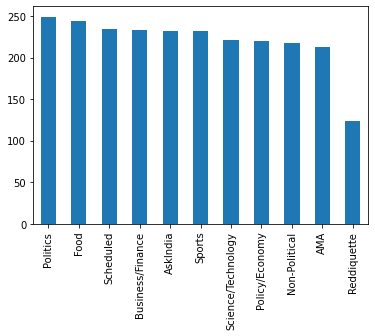

In [0]:
#Bar-Graph to Visualise Frequency of Flairs in DataSet

data['flair'].value_counts().plot(kind = 'bar')

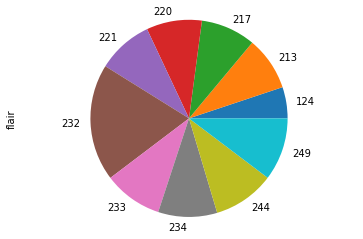

In [0]:
#Pie-Chart to Visualise Frequency of Flairs in the DataSet

data['flair'].value_counts().groupby(data['flair'].value_counts()).sum().plot(kind='pie')
plt.axis('equal')
plt.show()


In [0]:
''' As we can see the dataset is fairly balanced. However, Reddiquette has very less data points. Hence
OverSampling/Undersampling approaches can be experimented with'''

In [0]:
# Seeing Most Frequent Word Appearing in Each Flair Class To Understand Similar Relations

In [0]:
# Creating a list of words under each Flair to understand Mis-Classifications and Potential Errors
classes = data['flair']
unique = np.unique(classes)
li = []
for j, w in enumerate(unique):
  li.append(str(w))


In [0]:
from collections import Counter

In [0]:
df = data

In [0]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [0]:
#Creating A dictionary to Store Flair as Key and Words under that flair as Value
dicts = {}
for i, u in enumerate(unique):
  dicts[u] = " "
  for index, row in df.iterrows():
    if(row['flair']==str(u)):
      dicts[u] = dicts[u] + row['feature_combine']

In [0]:
# Creating a Dictionary to Store Flair as Key and Word Count as Value
Flair_Words = {}
for flair in dicts:
  l = []
  l = dicts[flair].split()
  counts = Counter(l)
  Flair_Words[flair] = counts

In [0]:
# Clusters of data Points under each flair to Understand Mis-Classifications

In [0]:
# K-Means Algorithm on our Data to Visualise Similarities between different groups of flairs.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X = data['feature_combine']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Xd = vectorizer.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


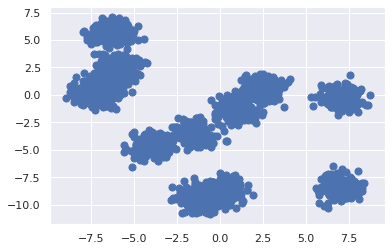

In [0]:
from sklearn.datasets.samples_generator import make_blobs
Xd, y_true = make_blobs(n_samples=2419, centers=11,
                       cluster_std=0.60, random_state=2)
plt.scatter(Xd[:, 0], Xd[:, 1], s=50);

In [0]:
#Using the K-Means Algorithm on our Dataset

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11)
kmeans.fit(Xd)
y_kmeans = kmeans.predict(Xd)

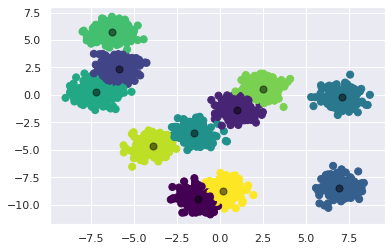

In [0]:
plt.scatter(Xd[:, 0], Xd[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)

In [0]:
for e,u in enumerate(unique):
  print(u)

AMA
AskIndia
Business/Finance
Food
Non-Political
Policy/Economy
Politics
Reddiquette
Scheduled
Science/Technology
Sports


In [0]:
''' Now we look at word counts in groups of flairs and find common relations which might lead to 
mis-classification due to high similarity of content.

In [0]:
# Group 1 : Politics, Policy/Economy, Business/ Finance
'''Intuition behind this idea is Most policy/economic decisions are associated with Govt. which has
good deal of politics associated with it. Also Digital India has led to Politics and
Business Sector tied together. Hence, most business/ policy related articles have Political
Relations'''

In [0]:
#Most Common Words of Business/Finance
print(Flair_Words['Business/Finance'].most_common(20))

[('http', 1048), ('https', 802), ('business', 629), ('like', 623), ('one', 563), ('government', 529), ('get', 520), ('news', 513), ('people', 512), ('also', 496), ('indian', 483), ('would', 478), ('money', 471), ('week', 460), ('bank', 440), ('good', 424), ('finance', 404), ('dont', 402), ('tax', 391), ('even', 390)]


In [0]:
#Most Common Words of Policy/Economy
print(Flair_Words['Policy/Economy'].most_common(20))

[('people', 790), ('economy', 676), ('like', 645), ('government', 627), ('https', 606), ('would', 595), ('indian', 518), ('one', 495), ('also', 469), ('even', 452), ('us', 424), ('http', 398), ('dont', 397), ('years', 383), ('tax', 373), ('modi', 367), ('economic', 358), ('policy', 349), ('get', 346), ('growth', 346)]


In [0]:
#Most Common Words of Politics
print(Flair_Words['Politics'].most_common(20))

[('people', 814), ('like', 571), ('https', 493), ('bjp', 481), ('dont', 449), ('one', 382), ('would', 332), ('even', 330), ('status', 322), ('twittercom', 300), ('delhi', 299), ('political', 298), ('government', 272), ('time', 265), ('get', 263), ('think', 260), ('politics', 254), ('country', 249), ('modi', 244), ('also', 243)]


In [0]:
'''The above analysis Suggests that Politics Flair has Words from Business and Policy under it. Hence 
any article with Business/Policy Flair has high chances of being Classified Political.'''

In [0]:
#Code to Visualize Data Points Under Political, Policy and Business Flairs
#Clearly, there is heavy overlap among the flairs
classes = data['flair']
unique = np.unique(classes)
colors = [plt.cm.jet(i/float(len(unique)-1)) for i in range(len(unique))]
u = [unique[2], unique[5],unique[6]]
ll = [3,6,8]

for i,q in enumerate(u):
  for j, e in enumerate(classes):
    if(str(e)==str(q)):
      plt.scatter(Xd[j,0], Xd[j,1], c=colors[ll[i]])
  plt.scatter(Xd[i,0],Xd[i,1],label = str(q))
    

plt.legend()
plt.show()

In [0]:
# Group 2:- Non-Political, AskIndia, Food
''' Intuition :- Non-Political posts are mostly about people, facts and lifestyles. Hence, Askindia,
Food related Articles and Non-Political often get mixed together. This intuition is backed by Frequent 
Word and Cluster Analysis'''

In [0]:
#Most Common Words of Non-Political
print(Flair_Words['Non-Political'].most_common(20))

[('like', 188), ('indian', 174), ('people', 171), ('dont', 169), ('one', 162), ('get', 146), ('would', 142), ('also', 132), ('time', 112), ('know', 107), ('r', 104), ('think', 101), ('political', 95), ('good', 87), ('im', 85), ('even', 84), ('much', 82), ('first', 81), ('way', 81), ('http', 77)]


In [0]:
#Most Common Words of AskIndia
print(Flair_Words['AskIndia'].most_common(20))

[('https', 2138), ('people', 2102), ('like', 1218), ('cases', 1191), ('religion', 1178), ('status', 1162), ('dont', 1162), ('twittercom', 961), ('one', 930), ('get', 864), ('know', 761), ('lockdown', 718), ('would', 716), ('also', 676), ('positive', 671), ('even', 670), ('time', 664), ('coronavirus', 642), ('good', 630), ('us', 615)]


In [0]:
#Most Common Words of Food
print(Flair_Words['Food'].most_common(20))

[('food', 716), ('people', 661), ('like', 387), ('dont', 361), ('get', 263), ('lockdown', 242), ('would', 229), ('one', 227), ('even', 227), ('https', 216), ('also', 208), ('time', 202), ('government', 193), ('good', 181), ('go', 176), ('know', 169), ('home', 169), ('need', 162), ('going', 159), ('eat', 148)]


In [0]:
# Cluster Visualization
classes = data['flair']
unique = np.unique(classes)
colors = [plt.cm.jet(i/float(len(unique)-1)) for i in range(len(unique))]
u = [unique[1], unique[3],unique[4]]
ll = [2,4,5]

for i,q in enumerate(u):
  for j, e in enumerate(classes):
    if(str(e)==str(q)):
      plt.scatter(Xd[j,0], Xd[j,1], c=colors[ll[i]])
  plt.scatter(Xd[i,0],Xd[i,1],label = str(q))
    

plt.legend()
plt.show()

In [0]:
''' As clearly seen above there's heavy similarity in Content of Flairs in Second Group'''

In [0]:
# Words in Reddiquette, Sports and Science/Technology are scattered and have no definite Grouping.
''' It can be verified by seeing Most Frequent Words in the three flairs as done below '''

In [0]:
#Most Common Words of Rediqqutte
print(Flair_Words['Reddiquette'].most_common(20))

[('like', 505), ('people', 479), ('dont', 467), ('bjp', 429), ('r', 379), ('one', 346), ('congress', 336), ('get', 333), ('time', 332), ('would', 328), ('https', 289), ('im', 268), ('even', 263), ('also', 258), ('want', 250), ('good', 247), ('see', 245), ('comments', 241), ('know', 238), ('someone', 223)]


In [0]:
#Most Common Words of Science/Technology
#It can be seen that Words under this flair are also present in most of the other flairs
print(Flair_Words['Science/Technology'].most_common(20))

[('religion', 1219), ('people', 1178), ('like', 876), ('dont', 724), ('one', 699), ('science', 677), ('good', 589), ('https', 538), ('get', 504), ('know', 496), ('also', 495), ('time', 493), ('would', 467), ('technology', 462), ('us', 450), ('even', 423), ('think', 420), ('believe', 411), ('want', 359), ('world', 351)]


In [0]:
#Most Common Words of Sports
print(Flair_Words['Sports'].most_common(20))

[('like', 545), ('people', 492), ('sports', 483), ('dont', 410), ('one', 346), ('indian', 339), ('get', 334), ('also', 313), ('good', 301), ('even', 287), ('would', 266), ('im', 223), ('think', 212), ('time', 208), ('mens', 198), ('https', 186), ('know', 185), ('team', 184), ('cricket', 183), ('well', 180)]


In [0]:
# Posts under AMA are distinct are there is chance of highly accurate prediction of posts under this Flair
# However, Content of Scheduled Flair is Mostly Subset of AMA as evident from word count analysis

In [0]:
#Most Common Words of AMA
print(Flair_Words['AMA'].most_common(20))

[('like', 1379), ('would', 1052), ('people', 1052), ('think', 941), ('get', 918), ('one', 915), ('ama', 740), ('dont', 689), ('time', 657), ('also', 637), ('indian', 625), ('work', 625), ('know', 621), ('https', 610), ('much', 572), ('good', 554), ('questions', 548), ('im', 525), ('deleted', 487), ('many', 479)]


In [0]:
#Most Common Words of Scheduled
print(Flair_Words['Scheduled'].most_common(20))

[('people', 437), ('like', 402), ('https', 369), ('dont', 336), ('get', 335), ('one', 326), ('would', 305), ('also', 282), ('caste', 276), ('time', 274), ('even', 260), ('work', 209), ('good', 209), ('know', 200), ('scheduled', 190), ('im', 187), ('want', 185), ('make', 179), ('much', 176), ('2', 174)]


In [0]:
#Conclusions from the Analysis Done Above:-

# 1. Posts under Business/Finance or Policy/Economy have strong political Content which creates Similarity
# 2. Posts under Non-Political, AskIndia and Food have common content
# 3. AMA has distinctive content, however Scheduled Flair's Content is its subset
# 4. Reddiquette, Sports and Science/Technology have common words but no strong grouping
# 5. Science/Technolgy Content is Subset of Content under most Flairs